In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
df = pd.read_csv("./online_shoppers_intention.csv")
df.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [13]:
df["Weekend"] = df["Weekend"].apply(lambda x: 1 if x== True else 0)
df["Revenue"] = df["Revenue"].apply(lambda x: 1 if x==True else 0)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [15]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

C:\Users\baxti\AppData\Local\Temp\ipykernel_13876\4023610365.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_revenue["Month"], y=monthly_revenue["Total Revenue"], palette=colors)


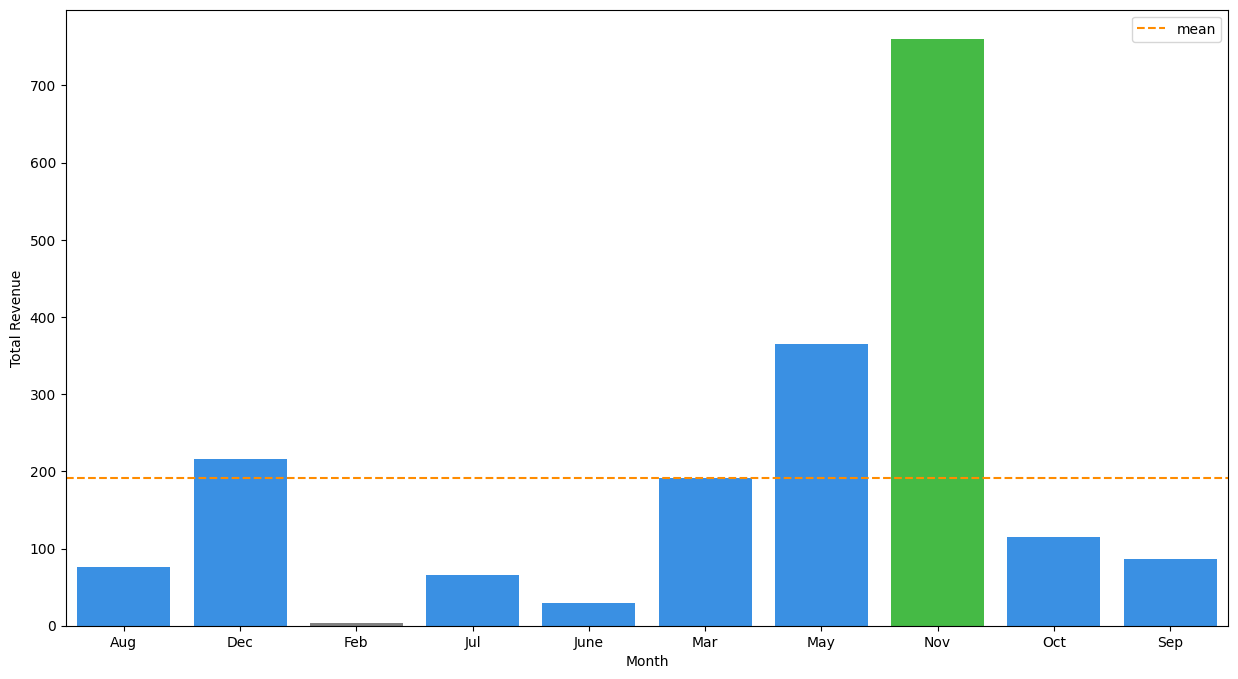

In [26]:
monthly_revenue = df.groupby("Month")["Revenue"].sum().reset_index(name="Total Revenue")

colors = ["limegreen" if x == max(monthly_revenue["Total Revenue"]) else "gray" if x== min(monthly_revenue["Total Revenue"]) else 'dodgerblue' for x in monthly_revenue["Total Revenue"]]


plt.figure(figsize=(15, 8))
sns.barplot(x=monthly_revenue["Month"], y=monthly_revenue["Total Revenue"], palette=colors)

plt.axhline(y=monthly_revenue["Total Revenue"].mean(), color="darkorange", label="mean", linestyle="--",linewidth=1.5)
plt.legend()

C:\Users\baxti\AppData\Local\Temp\ipykernel_13876\3181789827.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x=weekdays_vs_weekend["Weekend"], y=weekdays_vs_weekend["Count"], palette=colors)
C:\Users\baxti\AppData\Local\Temp\ipykernel_13876\3181789827.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


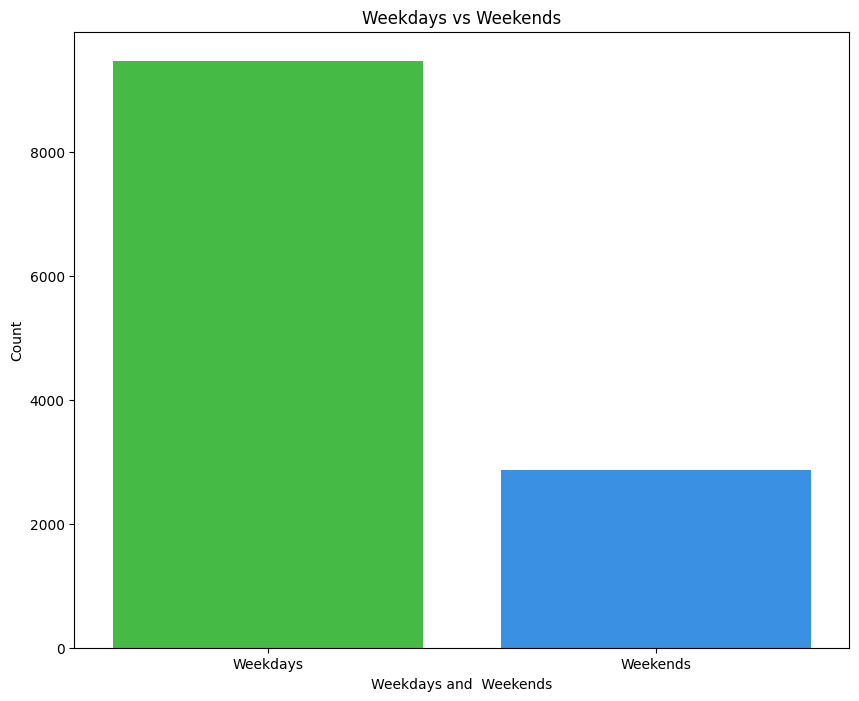

In [41]:
colors = ["limegreen", "dodgerblue"]
labels = ["Weekdays", "Weekends"]
weekdays_vs_weekend = df["Weekend"].value_counts().reset_index(name="Count")

plt.figure(figsize=(10, 8))
ax= sns.barplot(x=weekdays_vs_weekend["Weekend"], y=weekdays_vs_weekend["Count"], palette=colors)
plt.title("Weekdays vs Weekends")
plt.ylabel("Count")
plt.xlabel("Weekdays and  Weekends")
ax.set_xticklabels(labels)
plt.show()

C:\Users\baxti\AppData\Local\Temp\ipykernel_13876\1274036417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_revenue["Region"], y=region_revenue["Total Revenue"], palette=colors)


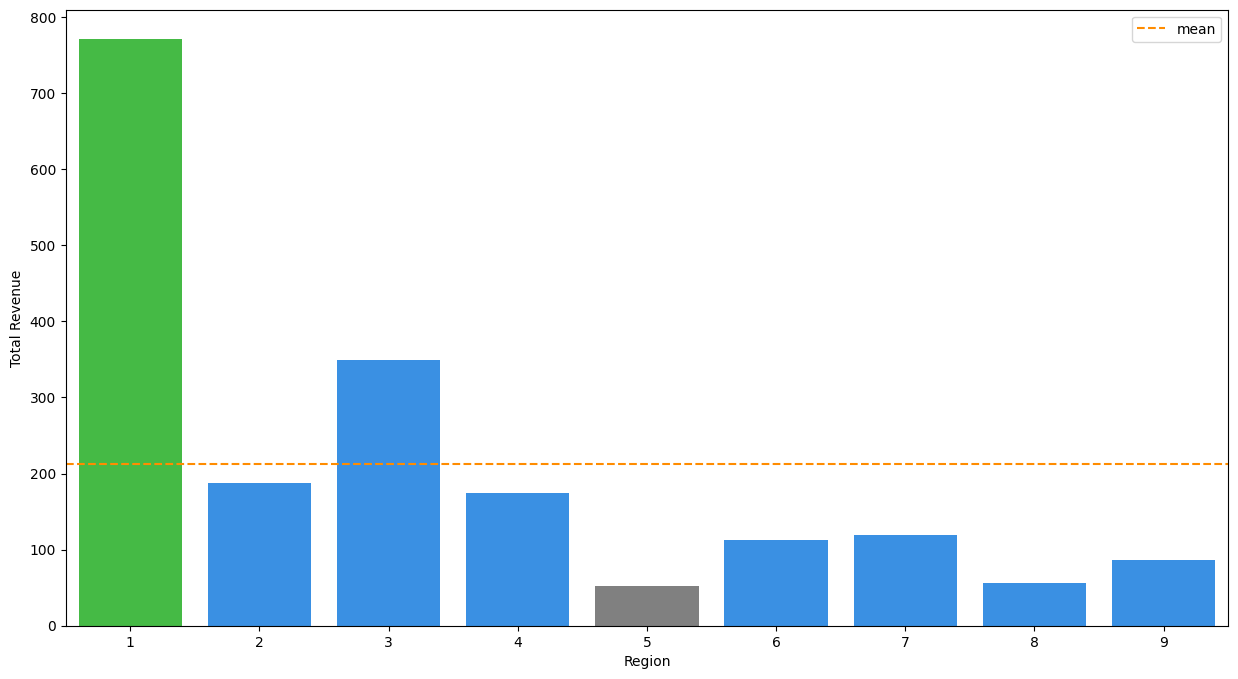

In [46]:
region_revenue = df.groupby("Region")["Revenue"].sum().reset_index(name="Total Revenue")

colors = ["limegreen" if x==max(region_revenue["Total Revenue"]) else "gray" if x==min(region_revenue["Total Revenue"]) else "dodgerblue" for x in region_revenue["Total Revenue"]]
plt.figure(figsize=(15, 8))
sns.barplot(x=region_revenue["Region"], y=region_revenue["Total Revenue"], palette=colors)
plt.axhline(y=region_revenue["Total Revenue"].mean(), linestyle="--", label="mean", color="darkorange")
plt.legend()
plt.show()



In [47]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

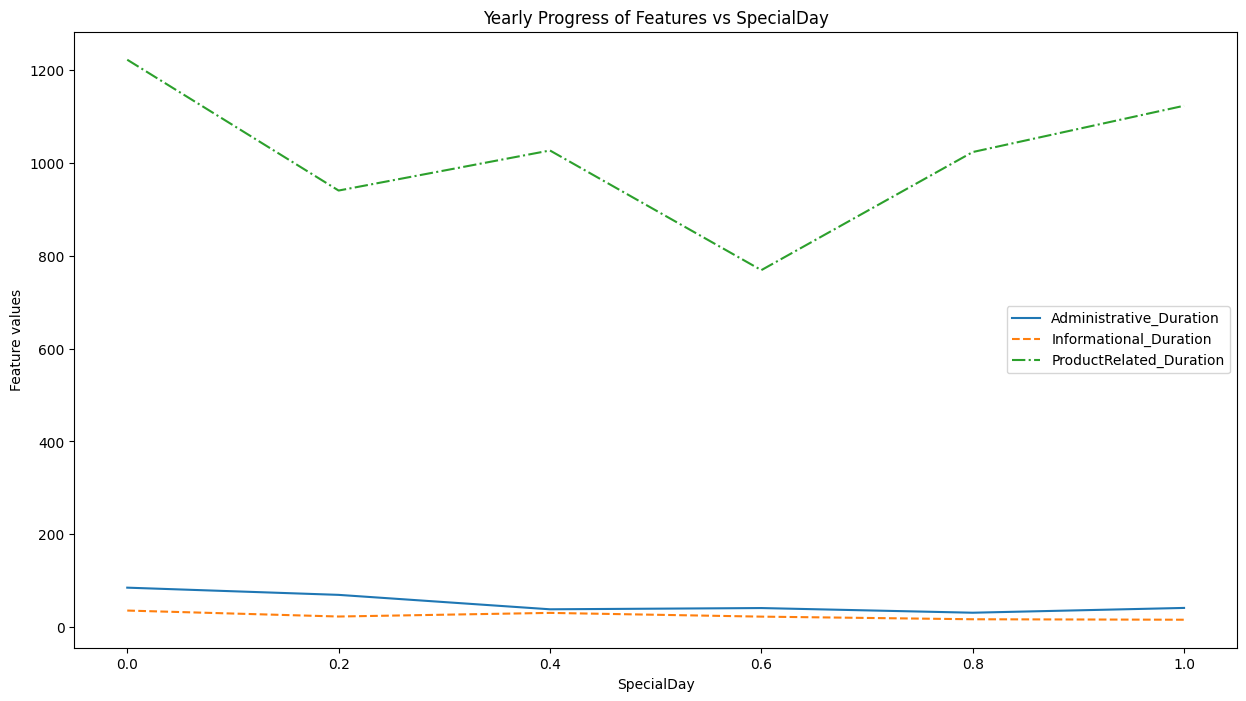

In [64]:
import matplotlib.pyplot as plt

def progress_plot(df, y_features, x_feature):
    plt.figure(figsize=(15, 8))

    # Get colors for each feature from colormap
    cmap = plt.get_cmap("tab10")  # Use colormap

    # Define linestyles
    linestyles = ['-', '--', '-.', ':']
    
    # Extend linestyles if there are more features than styles
    linestyles = linestyles * (len(y_features) // len(linestyles) + 1)

    for i, feature in enumerate(y_features):
        plt.plot(df[x_feature], df[feature], color=cmap(i), label=feature, linestyle=linestyles[i])

    plt.legend(loc='best')
    plt.xlabel(x_feature)
    plt.ylabel('Feature values')
    plt.title(f'Yearly Progress of Features vs {x_feature}')
    plt.show()

# Group by SpecialDay and calculate mean of durations
special_day_growth = df.groupby("SpecialDay")[["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"]].mean().reset_index()

# Plot the progress
progress_plot(special_day_growth, ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"], "SpecialDay")


In [86]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

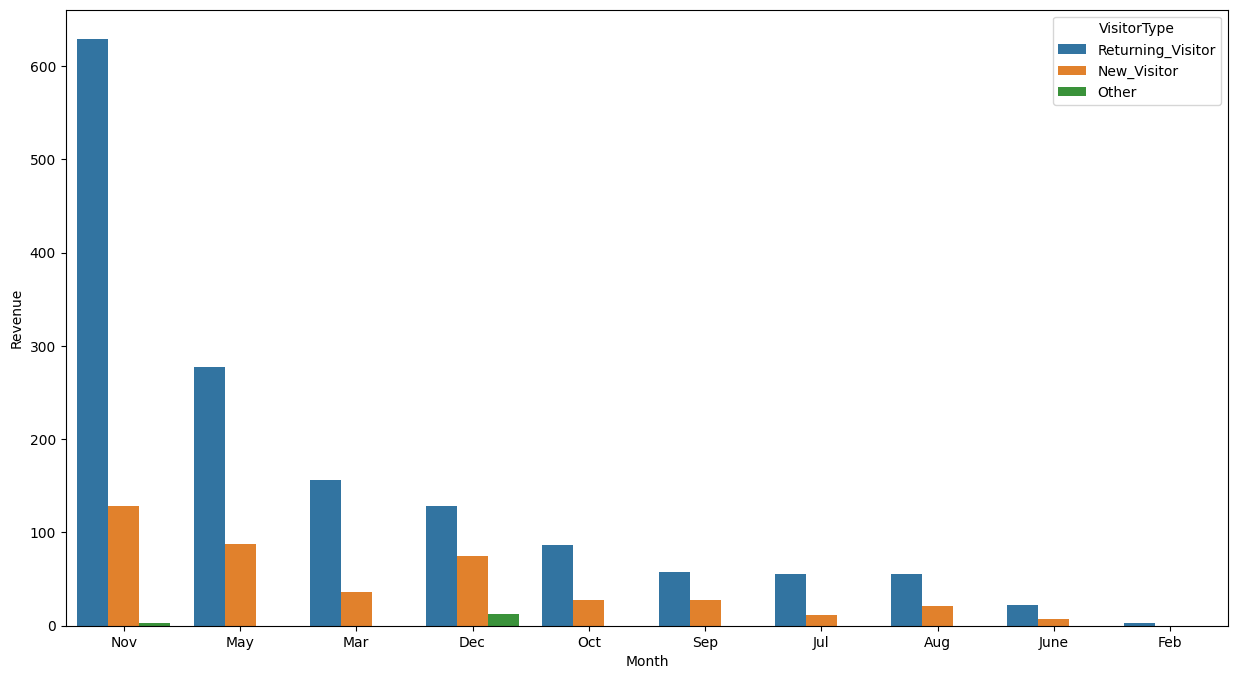

In [93]:
mostly_users_types = df.groupby(["VisitorType", "Month"])["Revenue"].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(data=mostly_users_types, x="Month", y="Revenue", hue='VisitorType')
plt.show()

In [94]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [96]:
def c_distribution(data, col_name, title):
    facet = sns.FacetGrid(data, hue= "Revenue",aspect=4)
    facet.map(sns.kdeplot,col_name,shade= True)
    facet.set(xlim=(0, data[col_name].max()))
    plt.subplots_adjust(top=0.9)
    facet.fig.suptitle(title)
    facet.add_legend()

C:\Users\baxti\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\baxti\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


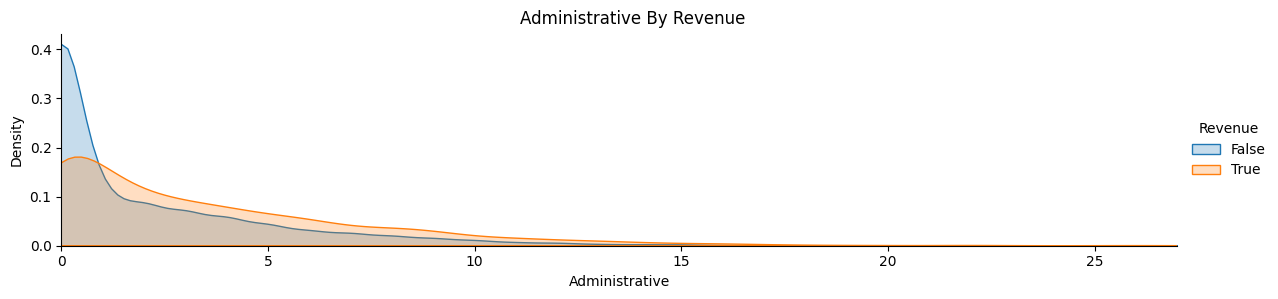

In [97]:
c_distribution(df, "Administrative", "Administrative By Revenue")

<Axes: ylabel='Administrative_Duration'>

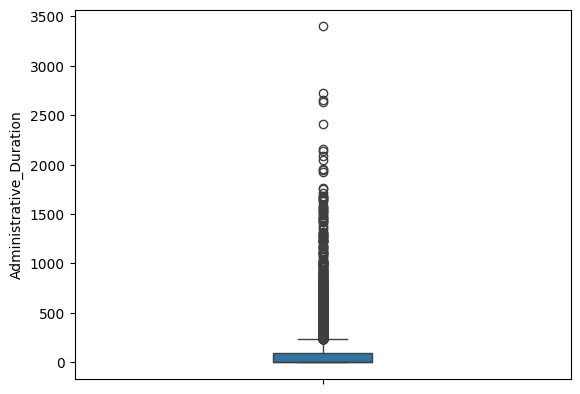

In [8]:
df["Administrative_Duration"].describe()

sns.boxplot(data=df, y="Administrative_Duration", width=0.2)

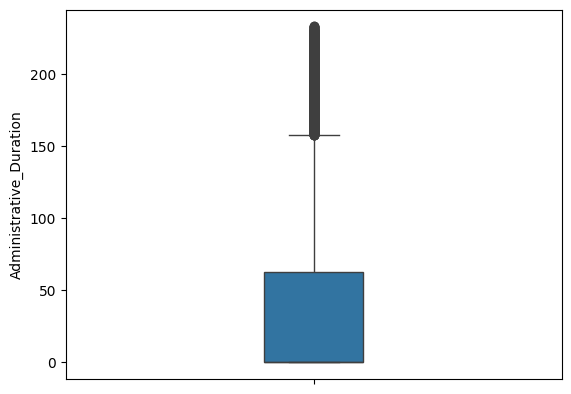

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you already have the dataframe 'df'
# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Administrative_Duration'].quantile(0.25)
Q3 = df['Administrative_Duration'].quantile(0.75)

# Step 2: Calculate IQR
IQR = Q3 - Q1

# Step 3: Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter the data to remove outliers
df_filtered = df[(df['Administrative_Duration'] >= lower_bound) & (df['Administrative_Duration'] <= upper_bound)]

# Step 5: Create the boxplot with filtered data
sns.boxplot(data=df_filtered, y="Administrative_Duration", width=0.2)
plt.show()


In [73]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

cat_columns = df.select_dtypes(include="object").columns
encoder = LabelEncoder()
for columm in cat_columns:
    df[columm] = encoder.fit_transform(df[columm])

In [74]:
from sklearn.model_selection import train_test_split
X, y = df.drop("Revenue", axis=1), df["Revenue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

def modeling(X_train, X_test, y_train, y_test):

    classifiers = [LogisticRegression(),SVC(), DecisionTreeClassifier()]

    for model in classifiers:
        print(f"Model: {model.__class__.__name__}")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        cr = classification_report(y_test, y_pred)

        print(f"Accuracy: {model.__class__.__name__}: {acc}")
        print("-------------------------------------------------------")
        print(f"Classification report: {model.__class__.__name__}\n {cr}")


In [78]:
modeling(X_train, X_test, y_train, y_test)

Model: LogisticRegression


C:\Users\baxti\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: LogisticRegression: 0.8678021086780211
-------------------------------------------------------
Classification report: LogisticRegression
               precision    recall  f1-score   support

           0       0.88      0.98      0.92      2055
           1       0.73      0.33      0.45       411

    accuracy                           0.87      2466
   macro avg       0.80      0.65      0.69      2466
weighted avg       0.85      0.87      0.85      2466

Model: SVC
Accuracy: SVC: 0.8353609083536091
-------------------------------------------------------
Classification report: SVC
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2055
           1       0.86      0.01      0.03       411

    accuracy                           0.84      2466
   macro avg       0.85      0.51      0.47      2466
weighted avg       0.84      0.84      0.76      2466

Model: DecisionTreeClassifier
Accuracy: DecisionTreeClassifier: 0.860

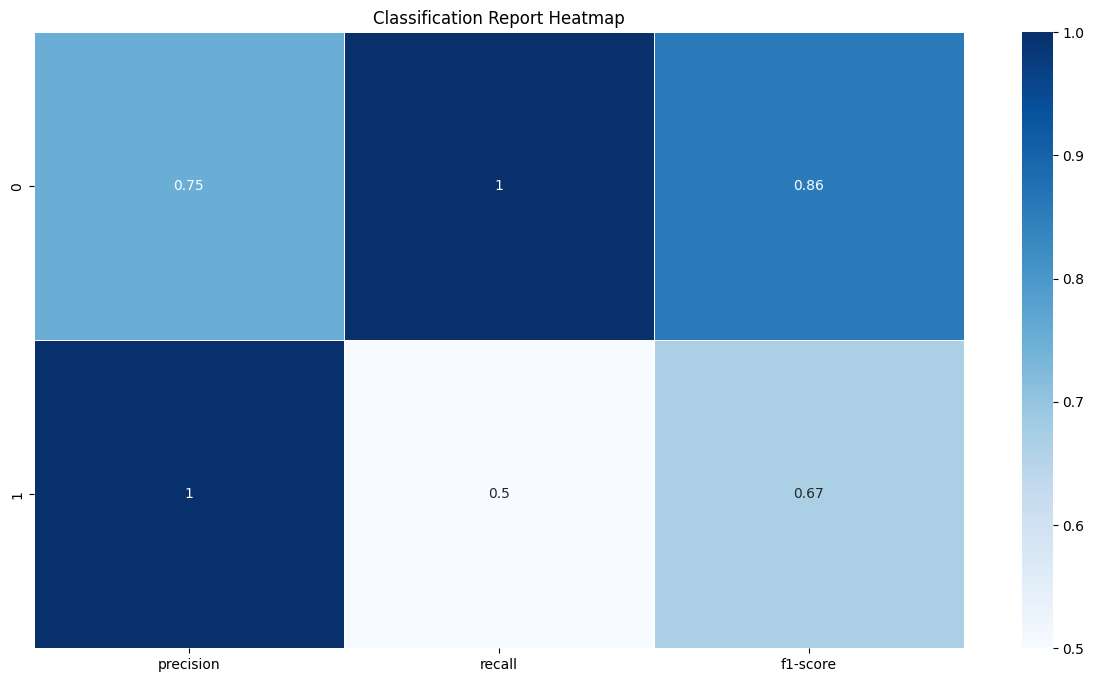

In [81]:
# Assuming y_true and y_pred are your true labels and predictions
y_true = [0, 1, 0, 1, 0]  # Replace with your true labels
y_pred = [0, 1, 0, 0, 0]  # Replace with your predicted labels

# Get the classification report as a dictionary
report = classification_report(y_true, y_pred, output_dict=True)

# Convert the report to a pandas DataFrame
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(15, 8))
# Plot a heatmap for precision, recall, and f1-score (excluding support)
metrics = df_report[['precision', 'recall', 'f1-score']].iloc[:-3]  # Exclude accuracy, macro avg, and weighted avg
sns.heatmap(metrics, annot=True, cmap="Blues", linewidths=0.5)

plt.title('Classification Report Heatmap')
plt.show()